## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [293]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [294]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [295]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [296]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [297]:
df.query('converted == 1').nunique()['user_id']/df.nunique()['user_id']

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [298]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [299]:
x = df.query('group == "treatment" and landing_page != "new_page"').shape[0]

In [300]:
y = df.query('group != "treatment" and landing_page == "new_page"').shape[0]

In [301]:
mismatch = x + y
mismatch

3893

f. Do any of the rows have missing values?

In [302]:
df.info()   # No rows with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [303]:
df2 = df.query('group == "treatment" and landing_page == "new_page"')
df2 = df2.append(df.query('group == "control" and landing_page == "old_page"'))
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [304]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [305]:
no_of_usrs = df2.nunique()['user_id']

In [306]:
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [307]:
df2[df2.duplicated(['user_id'])==True]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [308]:
df2[df['user_id'] == 773192]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [309]:
df2 = df2.drop_duplicates('user_id')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [310]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [311]:
control_mean = df2.query('group == "control"')['converted'].mean()
control_mean

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [312]:
treatment_mean = df2.query('group == "treatment"')['converted'].mean()
treatment_mean

0.11880806551510564

In [313]:
mean_diff = treatment_mean - control_mean
mean_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [314]:
new_page_p = df2['landing_page'].value_counts()['new_page']/df2.shape[0]
new_page_p

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

We can notice that the percentage of **conversion** of the **old control page** is **slightly higher than** that of the **new treatment page**.
We still can not say for sure wether the new treatment page is doing worse than the old one or not as this difference maybe due to **change aversion** effect.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ P_0: P_{new} - P_{old} \le 0 $$
$$ P_1: P_{new} - P_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [315]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [316]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [317]:
n_new = new_page_p * no_of_usrs
n_new

145310.0

d. What is $n_{old}$, the number of individuals in the control group?

In [318]:
n_old = (1-new_page_p) * no_of_usrs
n_old

145274.0

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [319]:
new_page_converted = df2.sample(int(n_new))
p_new = new_page_converted['converted'].mean()
p_new

0.11920033032826371

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [320]:
old_page_converted = df2.sample(int(n_old))
p_old = old_page_converted['converted'].mean()
p_old

0.11918168426559467

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [321]:
p_diffs = p_new - p_old
p_diffs

1.8646062669047669e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [322]:
p_diffs = []
for _ in range(10000):
    new_page_converted = df2.sample(int(n_new))
    p_new = new_page_converted['converted'].mean()
    old_page_converted = df2.sample(int(n_old))
    p_old = old_page_converted['converted'].mean()
    diff = p_new - p_old
    p_diffs.append(diff)
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

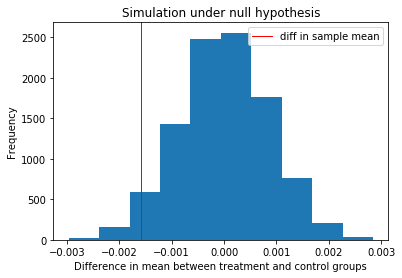

In [323]:
plt.hist(p_diffs);
plt.title('Simulation under null hypothesis')
plt.xlabel('Difference in mean between treatment and control groups')
plt.ylabel('Frequency')
plt.axvline(x=mean_diff, color='r', linewidth=1, label='diff in sample mean')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [324]:
(p_diffs > mean_diff).mean()

0.96640000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

It's called the **p-value** which is the probability of obtaining such a result assuming that the null hypothesis is True.
The high p-value suggests that we **do not have enough evidence** to **reject** the **null hypothesis** and **there's not any statistically significant difference** between the two pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [325]:
import statsmodels.api as sm

convert_old = df.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df.query('landing_page == "old_page"').shape[0]
n_new = df.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [326]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3683341399998907, 0.9143962454534289)

In [327]:
from statsmodels.stats.proportion import proportions_ztest
z_score, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_val

(1.3683341399998907, 0.9143962454534289)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score** is the number of std from the mean, the critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviation.
Looking at both p-value and z-score **we can not reject the null hypothesis**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logitics regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [328]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment'] # 1 for treatment and 0 for control
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [329]:
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [330]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:               8.077e-06
Time:                        12:47:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
- p-value associated with ab_page = 0.19
- In part II, then null hypothsis is that the old page is doing the same as or better than the new page. and we used permutation sampling and the ztest to calculate p-value
- In part III, we fitted a logistic regression model to predict wether the treatment page will convert customers or not.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- Yes, they maybe other categories that influence the conversion rates;
* Novelity effect and Change aversion. Whenever it's possible we can perform a blind a-b testing to overcome this problem.
* Other factors like customer interests, cultures can have effect on test results.

- Yes, we can add these terms to our regression model to be able to predict how the affect the conversion rates.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [331]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [332]:
countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [333]:
df2_with_countries = df2.join(countries.set_index('user_id'), on='user_id')
df2_with_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [334]:
df2_with_countries['UK'] = pd.get_dummies(df2_with_countries['country'])['UK']
df2_with_countries['CA'] = pd.get_dummies(df2_with_countries['country'])['CA']
df2_with_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,CA
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,0,1


In [335]:
logit_mod = sm.Logit(df2_with_countries['converted'], df2_with_countries[['intercept', 'UK', 'CA']])
res = logit_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:               1.521e-05
Time:                        12:47:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

- We can see the high p-value for both UK and CA suggests that they country has no significant influence of the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [336]:
logit_mod = sm.Logit(df2_with_countries['converted'], df2_with_countries[['intercept', 'ab_page', 'UK', 'CA']])
res = logit_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:               2.323e-05
Time:                        12:47:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

- With all the factors combines ('country', 'landing_page'), we have no enough evidence to reject the null hypothesis.